## Data Abstraction
The general technique of isolating the parts of a program that deal with how data are represented(as parts),     
that deal with how data are manipulated(as units)    
is a powerful design called *data abstraction*. 

The methodology by which functions enforce an abstraction barrier between representation and use.

The part that defines a concrete representation ,and the part that operates on abstract data ,are connected by a small set of functions.

### Example: Rational Numbers

A rational number = `<numerator>`/`<denominator>`   

In [7]:
from  math import gcd
#Representation
# constructor
def rational(n, d):
    g = gcd(n, d)
    #based on list literal
    return [n//g , d//g]
# selectors
def numer(x):
    #list literal
    return x[0]
def denom(x):
    return x[1]
# 在写下面的Manipulating functions之前 不用写出具体的
#constructor和selector也能表述正确，说明不依靠前者的底层
def print_rational(x):
    print(numer(x), "/", denom(x))
def add_rationals(x, y):
    nx, ny = numer(x), numer(y)
    dx, dy = denom(x), denom(y)
    return rational(nx*dy+ny*dx, dx*dy)
def mul_rationals(x ,y):
    nx, ny = numer(x), numer(y)
    dx, dy = denom(x), denom(y)
    return rational(nx*ny, dx*dy)

In [9]:
half = rational(1, 2)
print_rational(half)

third = rational(1, 3)
print_rational(add_rationals(third, third))

1 / 2
2 / 3


### Abstraction Barriers
how data are represented + how data are manipulated   
By using only those operations in manipulating the data, it is much easier to change the representation of abstract data without changing other operations.

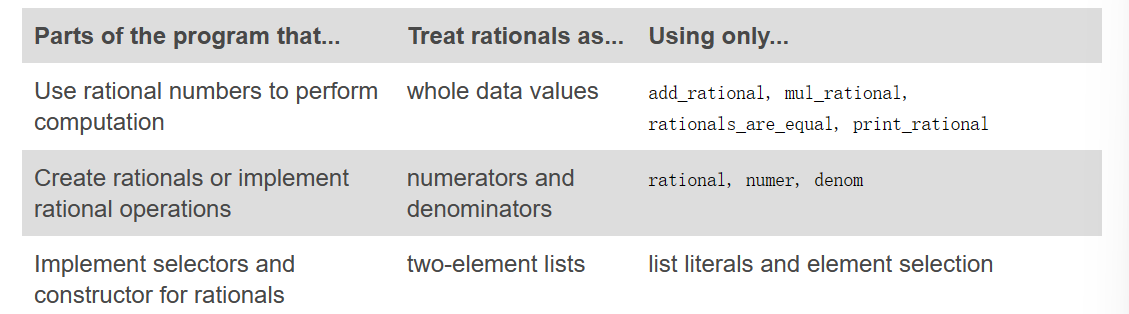
In each layer, the final column enforces an abstraction barrier.    
An **abstraction barrier violation** occurs when a part of the program that can use a higher level function instead uses a lower level one.
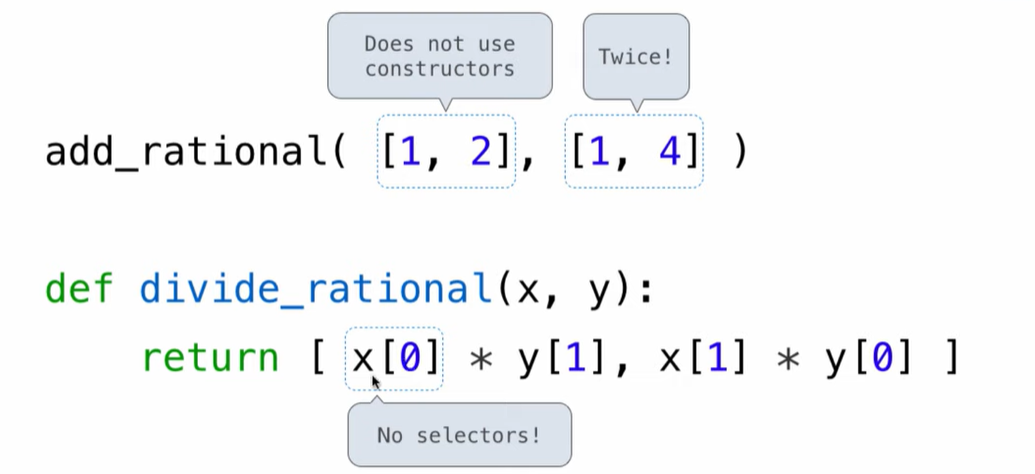

The **purpose** of maintaining abstraction barriers is so that we can change our data representation without rewriting the whole program.

a function that computes the square of a rational number is best implemented in terms of mul_rational, which **does not assume anything about the implementation of a rational number**.   
Thus it is robust to future changes

In [4]:
def square_rational(x):
    return mul_rationals(x, x)

: 

### Data Representation
#### What is data
- We need to guarantee that the constructor and selector functions work together to  specify the right behavior.
- Behavior condition: e.g. If we construct rational x from numerator n and denominator d, then `numer(x) / denom(x) == n/d`.
- Data abstraction uses selectors and constructors to define behavior
- If behavior conditions are met, then the representation is valid


In [8]:
#更改底层constructor和selector
def rational(n, d):
    g = gcd(n, d)
    def select(name):
        if name == 'n':
            return n // g
        elif name == 'd':
            return d // g
    return select

def numer(x):
    return x('n')
def denom(x):
    return x('d')

def print_rational(x):
    print(numer(x), "/", denom(x))
def add_rationals(x, y):
    nx, ny = numer(x), numer(y)
    dx, dy = denom(x), denom(y)
    return rational(nx*dy+ny*dx, dx*dy)
def mul_rationals(x ,y):
    nx, ny = numer(x), numer(y)
    dx, dy = denom(x), denom(y)
    return rational(nx*ny, dx*dy)